In [4]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Getting the dataSet
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
#Getting X and y value
X = df.iloc[:,[3,4]].values #Getting the x value(columns[Annual Income,Spending Score])

In [ ]:
#K-Means Clustering

In [12]:
#Using the elbow method to decide the number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11): #Ranging the n-clusters between 1 and 10
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42) 
    #n_cluster:number of clusters
    #init:function in this case k-means++ to avoid the rand_in_trap
    #random_state:42 funny number
    #Vivaldi Summer slaps guys!!!
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #Appending the wcss scores of each kmeans models
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21862.09267218289,
 19672.07284901432]

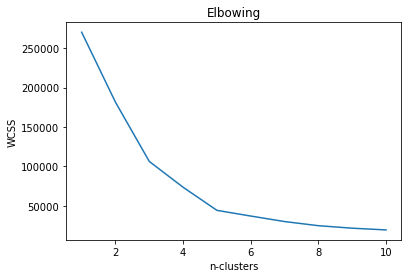

In [14]:
#Plotting to find the true cluster num
plt.plot(range(1,11),wcss)
plt.title("Elbowing")
plt.xlabel("n-clusters")
plt.ylabel("WCSS")
plt.show()
#n=5 looks like the true one

In [17]:
#Training the K-Means model
kmeansMOD = KMeans(n_clusters=5,init="k-means++",random_state=42)
y_kmeans = kmeansMOD.fit_predict(X)

In [18]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

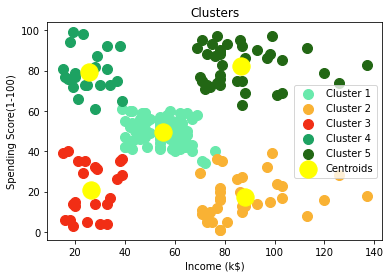

In [21]:
#Visualising
for i in range(0,5):
    plt.scatter(X[y_kmeans==i,0],X[y_kmeans==i,1],s=100,c=np.random.rand(3,),label=f"Cluster {i+1}")
plt.scatter(kmeansMOD.cluster_centers_[:,0],kmeansMOD.cluster_centers_[:,1],s=300,c="yellow",label="Centroids")
plt.title("Clusters")
plt.xlabel("Income (k$)")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()

In [22]:
#Hierarchical Clustering

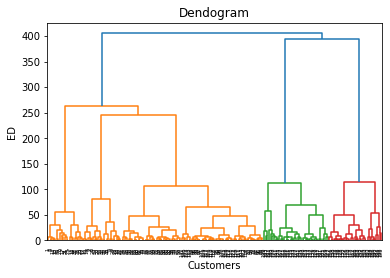

In [25]:
#Using Dendogram to decide the n-cluster
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X,method="ward"))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("ED")
plt.show()

#5 looks like the ideal cluster num

In [29]:
#Trining our model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity="euclidean",linkage="ward")
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [30]:
!column -s, -t < Mall_Customers.csv | less -#2 -N -S

      1 CustomerID  Genre   Age  Annual Income (k$)  Spending Score (1-100)
      2 0001        Male    19   15                  39
      3 0002        Male    21   15                  81
      4 0003        Female  20   16                  6
      5 0004        Female  23   16                  77
      6 0005        Female  31   17                  40
      7 0006        Female  22   17                  76
      8 0007        Female  35   18                  6
      9 0008        Female  23   18                  94
     10 0009        Male    64   19                  3
     11 0010        Female  30   19                  72
     12 0011        Male    67   19                  14
     13 0012        Female  35   19                  99
     14 0013        Female  58   20                  15
     15 0014        Female  24   20                  77
     16 0015        Male    37   20                  13
     17 0016        Male    22   20                  79
     18 0017        Female  35 

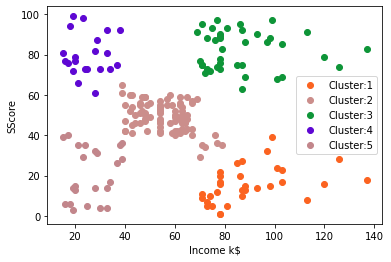

In [34]:
#Visualising the clusters
for i in range(0,5):
    plt.scatter(X[y_hc==i,0],X[y_hc==i,1],color=np.random.rand(3,),label=f"Cluster:{i+1}")
plt.xlabel("Income k$")
plt.ylabel("SScore")
plt.legend()
plt.show()

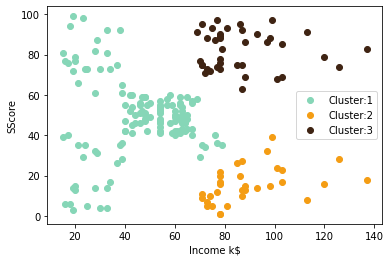

In [38]:
#What if n-clusters =3 
hc2 = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_hc2 = hc2.fit_predict(X)

#Visualising the clusters
for i in range(0,3):
    plt.scatter(X[y_hc2==i,0],X[y_hc2==i,1],color=np.random.rand(3,),label=f"Cluster:{i+1}")
plt.xlabel("Income k$")
plt.ylabel("SScore")
plt.legend()
plt.show()

In [ ]:
#Not very accurate n-clusters=5 look more useful
#Targeting the CLuster 5 is a better idea for marketing